In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
from sqlalchemy import create_engine

# MySQL Connection Details
username = "root"      
password = "root"     
host = "localhost"             
database = "washing_machine_db"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}/{database}")

# Read data from table
df = pd.read_sql("SELECT * FROM washing_machines", con=engine)

df.head()


,id,Product_Name,brand_name,capacity_kg,machine_type,load_type,color,Current_Price,Original_Price,Discount,rating_score,Ratings_Count,Reviews_Count,max_speed_RPM,energy_rating_stars,warranty_product_years,warranty_motor_years,has_inbuilt_heater,Product_URL
0,1,"Whirlpool 7 kg 5 Star with Ace Wash Station, 1...",Whirlpool,7.0,Semi Automatic,Top Load,"Grey, Dazzle",8490,12800,33,4.4,41859,2721,1400,5,4,4,0,https://www.flipkart.com/whirlpool-7-kg-5-star...
1,2,MarQ by Flipkart 6 kg 5 Star Rating Innowash R...,MarQ,6.0,Semi Automatic,Top Load,"White, Maroon",6990,11990,41,4.3,30399,2662,1350,5,2,2,0,https://www.flipkart.com/marq-flipkart-6-kg-5-...
2,3,realme TechLife 7 kg 5 Star rating Semi Automa...,realme,7.0,Semi Automatic,Top Load,"Black, White",7890,12490,36,4.2,95150,8215,1400,5,2,2,0,https://www.flipkart.com/realme-techlife-7-kg-...
3,4,realme TechLife 7.5 kg 5 Star Rating Semi Auto...,realme,7.5,Semi Automatic,Top Load,"Black, Grey",7890,13990,43,4.2,95150,8215,1400,5,2,2,0,https://www.flipkart.com/realme-techlife-7-5-k...
4,5,"LG 7 kg 5 Star with Wind Jet Dry, Collar Scrub...",LG,7.0,Semi Automatic,Top Load,"Grey, White",10990,16390,32,4.5,52540,3172,1350,5,2,2,0,https://www.flipkart.com/lg-7-kg-5-star-wind-j...


In [3]:
print(df.shape)
print(df.dtypes)


(514, 19)
id                          int64
Product_Name               object
brand_name                 object
capacity_kg               float64
machine_type               object
load_type                  object
color                      object
Current_Price               int64
Original_Price              int64
Discount                    int64
rating_score              float64
Ratings_Count               int64
Reviews_Count               int64
max_speed_RPM               int64
energy_rating_stars         int64
warranty_product_years      int64
warranty_motor_years        int64
has_inbuilt_heater          int64
Product_URL                object
dtype: object


In [4]:
df.describe()


,id,capacity_kg,Current_Price,Original_Price,Discount,rating_score,Ratings_Count,Reviews_Count,max_speed_RPM,energy_rating_stars,warranty_product_years,warranty_motor_years,has_inbuilt_heater
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,257.500000,8.162451,21646.272374,30935.552529,28.902724,3.829377,10609.293774,885.951362,1117.058366,4.976654,2.334630,2.459144,0.344358
std,148.523287,1.514688,12968.316832,18982.756063,12.937934,1.549046,22362.816929,1914.599959,300.873019,0.215029,1.078266,1.433137,0.475621
min,1.000000,5.500000,6899.000000,8999.000000,0.000000,0.000000,0.000000,0.000000,550.000000,3.000000,1.000000,1.000000,0.000000
25%,129.250000,7.000000,12559.750000,18712.500000,22.000000,4.000000,13.250000,1.000000,740.000000,5.000000,2.000000,2.000000,0.000000
50%,257.500000,8.000000,17494.500000,25070.000000,28.000000,4.300000,292.500000,24.000000,1300.000000,5.000000,2.000000,2.000000,0.000000
75%,385.750000,9.000000,29392.500000,40997.500000,37.000000,4.300000,6638.000000,632.750000,1400.000000,5.000000,2.000000,2.000000,1.000000
max,514.000000,14.000000,159990.000000,275000.000000,63.000000,10.500000,104994.000000,8215.000000,1600.000000,5.000000,10.000000,10.000000,1.000000


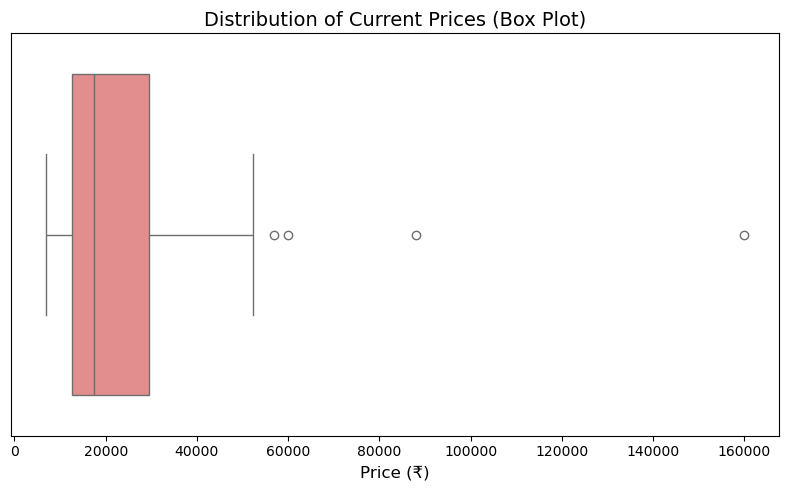

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Current_Price"], color='lightcoral')
plt.title("Distribution of Current Prices (Box Plot)", fontsize=14)
plt.xlabel("Price (₹)", fontsize=12)
plt.yticks([]) # Hide the Y-axis ticks as they are not needed
plt.tight_layout()
plt.show()

In [6]:

# calculate IQR
Q1 = df['Current_Price'].quantile(0.25)
Q3 = df['Current_Price'].quantile(0.75)
IQR = Q3 - Q1

#finding lower bound and upper bounfd
L_bound = Q1 - (1.5 * IQR)
U_bound = Q3 + (1.5 * IQR)

print(f"Lower Fence (minimum value to keep): {L_bound:,.2f} ₹")
print(f"Upper Fence (maximum value to keep): {U_bound:,.2f} ₹")


# replacing outliers with mean

df['Current_Price'] = np.where((df['Current_Price'] < L_bound) | (df['Current_Price'] > U_bound),df['Current_Price'].mean(),df['Current_Price'])

Lower Fence (minimum value to keep): -12,689.38 ₹
Upper Fence (maximum value to keep): 54,641.62 ₹


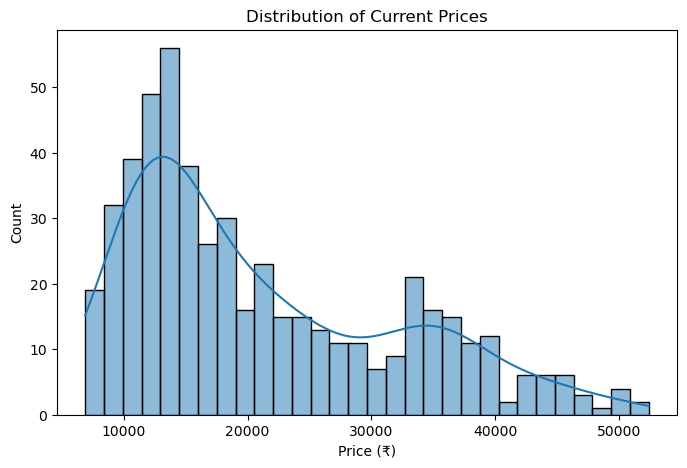

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["Current_Price"], bins=30, kde=True)
plt.title("Distribution of Current Prices")
plt.xlabel("Price (₹)")
plt.ylabel("Count")
plt.show()


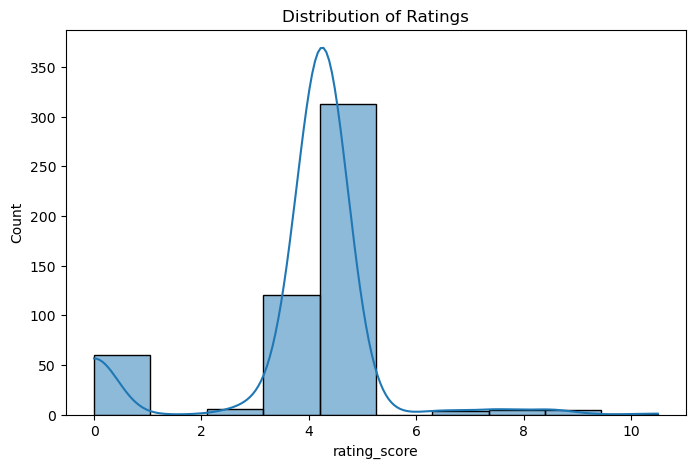

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df["rating_score"],bins=10,kde=True)
plt.title("Distribution of Ratings")
plt.show()


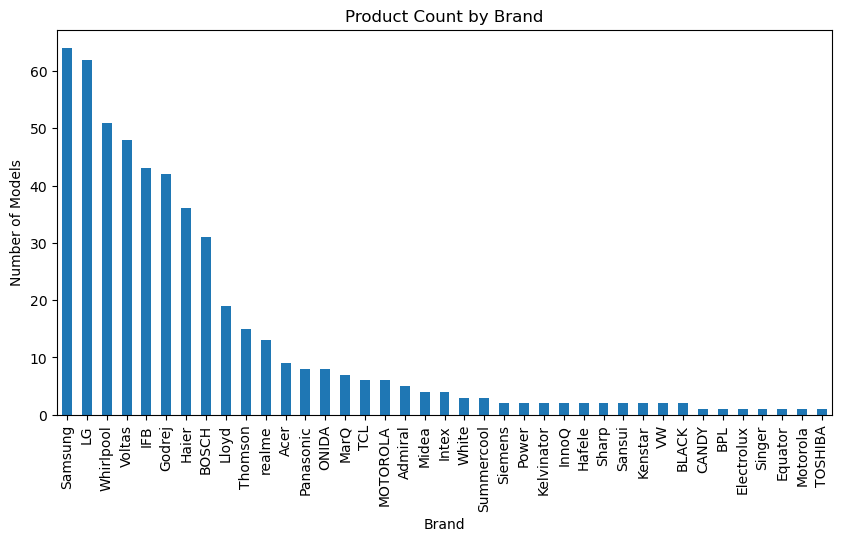

In [9]:
plt.figure(figsize=(10,5))
df["brand_name"].value_counts().plot(kind="bar")
plt.title("Product Count by Brand")
plt.xlabel("Brand")
plt.ylabel("Number of Models")
plt.show()


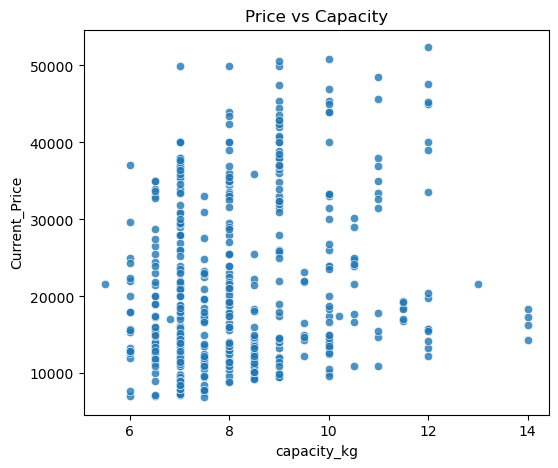

In [10]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="capacity_kg", y="Current_Price",  alpha=.8)
plt.title("Price vs Capacity")
plt.show()


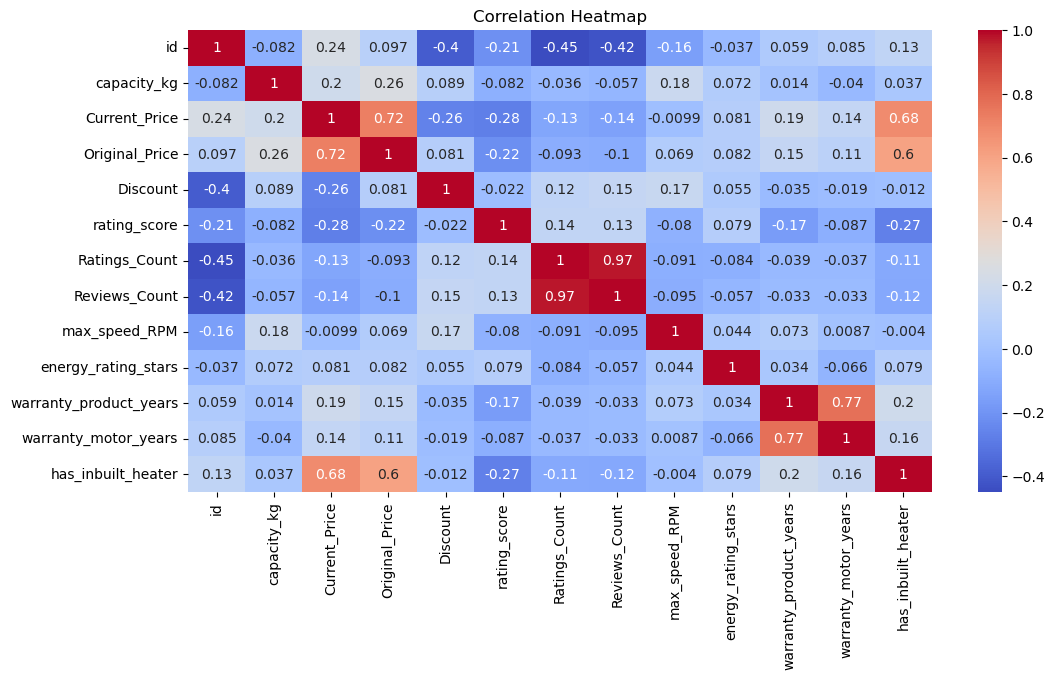

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=["float","int"]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [12]:
from scipy.stats import ttest_ind

Ho = "No significant Difference in Price between Two types"
H1 = "There is a Significant Difference in Average price between two types"

semi = df[df["machine_type"]=="Semi Automatic"]["Current_Price"]
full = df[df["machine_type"]=="Fully Automatic"]["Current_Price"]

t_stat, p_val = ttest_ind(semi, full, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

S_value = 0.05

if p_val<S_value:
    print(f"Null Hypothesis is Rejected, {H1}")
else:
    print(f"Failed to Reject Null hypothesis , {Ho}")


T-statistic: -24.212060515724474
P-value: 2.756123352667182e-79
Null Hypothesis is Rejected, There is a Significant Difference in Average price between two types


In [13]:
from scipy.stats import f_oneway

Ho = "star rarings and Price have no relationship"
H1 = "Machines with higher star ratings have higher price"

groups = [group["Current_Price"] for name, group in df.groupby("energy_rating_stars")]

f_stat, p_val = f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_val)

S_value = 0.05

if p_val<S_value:
    print(f"Null Hypothesis is Rejected, {H1}")
else:
    print(f"Failed to Reject Null hypothesis , {Ho}")



F-statistic: 3.352920512431405
P-value: 0.0676668460378559
Failed to Reject Null hypothesis , star rarings and Price have no relationship


Clustering

In [14]:
df["machine_type_encoded"] = df['machine_type'].map({"Semi Automatic" : 0, "Fully Automatic": 1})
df["load_type_encoded"] = df['load_type'].map({"Front Load" : 1, "Top Load": 0})


In [15]:
df["load_type_encoded"]

0      0
1      0
2      0
3      0
4      0
      ..
509    1
510    0
511    1
512    1
513    1
Name: load_type_encoded, Length: 514, dtype: int64

In [16]:
cluster_features = [
    "Current_Price",
    "capacity_kg",
    "max_speed_RPM",
    "warranty_product_years",
    "warranty_motor_years",
    "has_inbuilt_heater",
    "machine_type_encoded",
    "load_type_encoded"
]

df_cluster = df[cluster_features].copy()


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

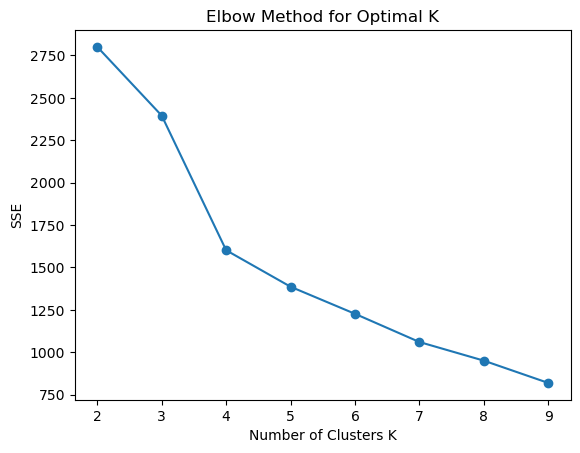

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.plot(K, sse, 'o-')
plt.xlabel("Number of Clusters K")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()


In [19]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [20]:
df.groupby("cluster")[cluster_features].mean()


,Current_Price,capacity_kg,max_speed_RPM,warranty_product_years,warranty_motor_years,has_inbuilt_heater,machine_type_encoded,load_type_encoded
cluster,,,,,,,,
0,12161.245000,8.467500,1331.550000,2.035000,2.085000,0.000000,0.000000,0.000000
1,34398.192399,8.038835,1269.417476,2.038835,2.038835,0.854369,1.000000,1.000000
2,30893.250393,8.271930,1162.807018,4.473684,5.456140,0.824561,0.947368,0.631579
3,20205.980519,7.808442,719.662338,2.129870,2.116883,0.272727,0.974026,0.000000


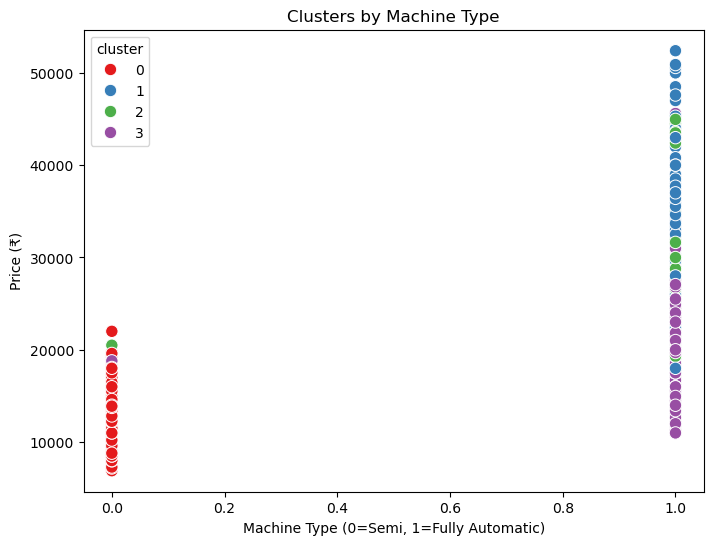

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="machine_type_encoded",
    y="Current_Price",
    hue="cluster",
    palette="Set1",
    s=80
)
plt.title("Clusters by Machine Type")
plt.xlabel("Machine Type (0=Semi, 1=Fully Automatic)")
plt.ylabel("Price (₹)")
plt.show()


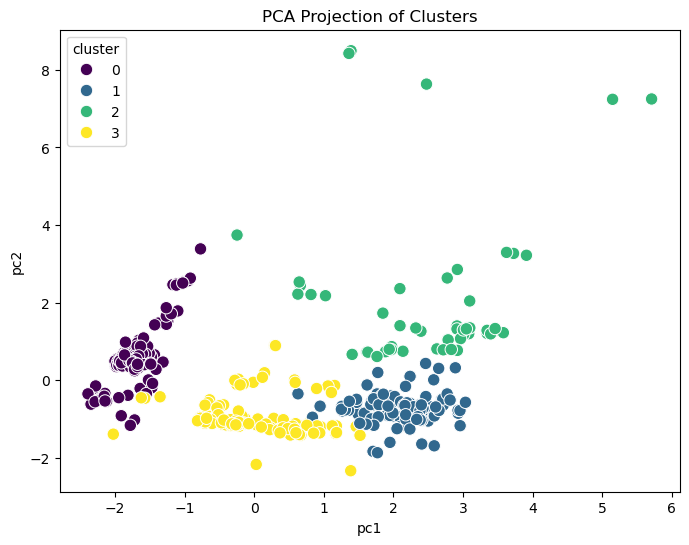

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

df["pc1"] = pca_data[:,0]
df["pc2"] = pca_data[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, x="pc1", y="pc2",
    hue="cluster", palette="viridis", s=80
)
plt.title("PCA Projection of Clusters")
plt.show()


In [23]:
pca_data

array([[-1.16965158,  2.46279723],
       [-1.99608195,  0.37424129],
       [-1.96279386,  0.50206553],
       ...,
       [ 2.33375285, -1.01024611],
       [ 1.36558934, -0.54321583],
       [ 1.94915724, -1.60267236]])

In [24]:
cluster_labels = {
    0: "Budget Semi Automatic",
    1: "Premium Front Load",
    2: "Mid-Range Top Load Automatic",
    3: "Flagship Front Load (Heater)"
}

df["cluster_label"] = df["cluster"].map(cluster_labels)


In [25]:
df['cluster_label'].value_counts()

cluster_label
Budget Semi Automatic           200
Flagship Front Load (Heater)    154
Premium Front Load              103
Mid-Range Top Load Automatic     57
Name: count, dtype: int64

In [26]:
df.columns

Index(['id', 'Product_Name', 'brand_name', 'capacity_kg', 'machine_type',
       'load_type', 'color', 'Current_Price', 'Original_Price', 'Discount',
       'rating_score', 'Ratings_Count', 'Reviews_Count', 'max_speed_RPM',
       'energy_rating_stars', 'warranty_product_years', 'warranty_motor_years',
       'has_inbuilt_heater', 'Product_URL', 'machine_type_encoded',
       'load_type_encoded', 'cluster', 'pc1', 'pc2', 'cluster_label'],
      dtype='object')

# Supervised Learning

In [27]:
features =[
    "capacity_kg",
    "machine_type_encoded",
    "load_type_encoded",
    "Current_Price",
    "max_speed_RPM",
    "warranty_product_years",
    "warranty_motor_years",
    "has_inbuilt_heater",
    "Ratings_Count"
    
]

In [28]:
Target = "cluster"

In [29]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from xgboost import XGBClassifier

In [31]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[Target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [32]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression F1 Score", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9457364341085271
Logistic Regression F1 Score 0.9457364341085271
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.96      0.96      0.96        25
           2       0.75      1.00      0.86        12
           3       0.97      0.87      0.92        39

    accuracy                           0.95       129
   macro avg       0.92      0.95      0.93       129
weighted avg       0.95      0.95      0.95       129



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.6976744186046512
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        53
           1       0.70      0.84      0.76        25
           2       0.00      0.00      0.00        12
           3       0.61      0.51      0.56        39

    accuracy                           0.70       129
   macro avg       0.51      0.57      0.54       129
weighted avg       0.62      0.70      0.65       129



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("kNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


kNN Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.80      0.96      0.87        53
           1       0.56      0.56      0.56        25
           2       0.00      0.00      0.00        12
           3       0.70      0.54      0.61        39

    accuracy                           0.67       129
   macro avg       0.51      0.52      0.51       129
weighted avg       0.65      0.67      0.65       129



In [35]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9922480620155039
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       1.00      1.00      1.00        25
           2       0.92      1.00      0.96        12
           3       1.00      1.00      1.00        39

    accuracy                           0.99       129
   macro avg       0.98      1.00      0.99       129
weighted avg       0.99      0.99      0.99       129



In [36]:
rf = RandomForestClassifier(n_estimators=15, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        39

    accuracy                           1.00       129
   macro avg       1.00      1.00      1.00       129
weighted avg       1.00      1.00      1.00       129



In [37]:
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9922480620155039
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        25
           2       1.00      0.92      0.96        12
           3       0.97      1.00      0.99        39

    accuracy                           0.99       129
   macro avg       0.99      0.98      0.99       129
weighted avg       0.99      0.99      0.99       129



In [38]:
def evaluate_model(name, y_true, y_pred):
    print(f"---- {name} ----")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Macro:", f1_score(y_true, y_pred, average='macro'))
    print("F1 Weighted:", f1_score(y_true, y_pred, average='weighted'))
    print()


In [39]:
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("SVM", y_test, y_pred_svm)
evaluate_model("kNN", y_test, y_pred_knn)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)
evaluate_model("Decision Tree", y_test, y_pred_dt)


---- Logistic Regression ----
Accuracy: 0.9457364341085271
F1 Macro: 0.9292984628833685
F1 Weighted: 0.946694202508156

---- SVM ----
Accuracy: 0.6976744186046512
F1 Macro: 0.5356803327391563
F1 Weighted: 0.6542994928767842

---- kNN ----
Accuracy: 0.6666666666666666
F1 Macro: 0.5101226309921962
F1 Weighted: 0.6507306871310916

---- Random Forest ----
Accuracy: 1.0
F1 Macro: 1.0
F1 Weighted: 1.0

---- XGBoost ----
Accuracy: 0.9922480620155039
F1 Macro: 0.9859658778205833
F1 Weighted: 0.9921286045231726

---- Decision Tree ----
Accuracy: 0.9922480620155039
F1 Macro: 0.9876190476190476
F1 Weighted: 0.9923661867847914



In [41]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(eval_metric='mlogloss')

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    xgb,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best XGB Params:", grid_search.best_params_)
print("Best XGB Score:", grid_search.best_score_)


Best XGB Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best XGB Score: 0.9839427933177932


In [42]:
# param_grid_svm = {
#     'C': [0.1, 1, 10, 50],
#     'kernel': ['rbf', 'poly'],
#     'gamma': ['scale', 'auto']
# }

# grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=3, scoring='f1_macro')
# grid_svm.fit(X_train, y_train)

# print(grid_svm.best_params_)
# print(grid_svm.best_score_)


In [43]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]   # Manhattan vs Euclidean distances
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='f1_macro')
grid_knn.fit(X_train, y_train)

print(grid_knn.best_params_)
print(grid_knn.best_score_)


{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
0.678528334178207


In [52]:
brand_popularity = (
    df.groupby("brand_name")["Ratings_Count"]
      .sum()
      .reset_index()
      .rename(columns={"Ratings_Count": "total_ratings_count"})
)
brand_quality = (
    df.groupby("brand_name")["rating_score"]
      .mean()
      .reset_index()
      .rename(columns={"rating_score": "avg_rating_score"})
)
brand_summary = pd.merge(brand_popularity, brand_quality, on="brand_name")
threshold = 30000
brand_summary = brand_summary[brand_summary["total_ratings_count"] >= threshold]
brand_summary["weighted_score"] = brand_summary["avg_rating_score"] * np.log1p(brand_summary["total_ratings_count"])
brand_summary = brand_summary.sort_values("weighted_score", ascending=False)
brand_summary




,brand_name,total_ratings_count,avg_rating_score,weighted_score
38,realme,718845,4.169231,56.223755
16,LG,803382,4.067742,55.307406
36,Whirlpool,499727,4.201961,55.137370
19,MarQ,343535,4.271429,54.448102
22,ONIDA,282378,4.187500,52.557335
25,Samsung,984089,3.671875,50.669939
35,Voltas,201251,4.129167,50.426676
33,Thomson,234546,4.066667,50.286006
10,Haier,634198,3.733333,49.877774
18,MOTOROLA,55022,4.166667,45.481277


In [54]:
cluster_summary = (
    df.groupby("cluster_label")
      .agg({
          "Current_Price": ["mean", "min", "max"],
          "rating_score": "mean",
          "Ratings_Count": "sum",
          "Reviews_Count": "sum",
          "Product_Name": "count"
      })
)

# Flatten multi-index columns
cluster_summary.columns = [
    "avg_price", "min_price", "max_price", "avg_rating",
    "total_ratings", "total_reviews", "num_products"
]

cluster_summary = cluster_summary.reset_index()

# Additional calculated feature
cluster_summary["avg_ratings_per_product"] = cluster_summary["total_ratings"] / cluster_summary["num_products"]
cluster_summary["price_range"] = cluster_summary["max_price"] - cluster_summary["min_price"]

cluster_summary


,cluster_label,avg_price,min_price,max_price,avg_rating,total_ratings,total_reviews,num_products,avg_ratings_per_product,price_range
0,Budget Semi Automatic,12161.245000,6899.0,21999.0,4.186500,2090616,168999,200,10453.080000,15100.0
1,Flagship Front Load (Heater),20205.980519,10990.0,45590.0,3.976623,2378609,201366,154,15445.512987,34600.0
2,Mid-Range Top Load Automatic,30893.250393,13599.0,47490.0,3.307018,513130,46727,57,9002.280702,33891.0
3,Premium Front Load,34398.192399,17990.0,52390.0,3.204854,470822,38287,103,4571.087379,34400.0


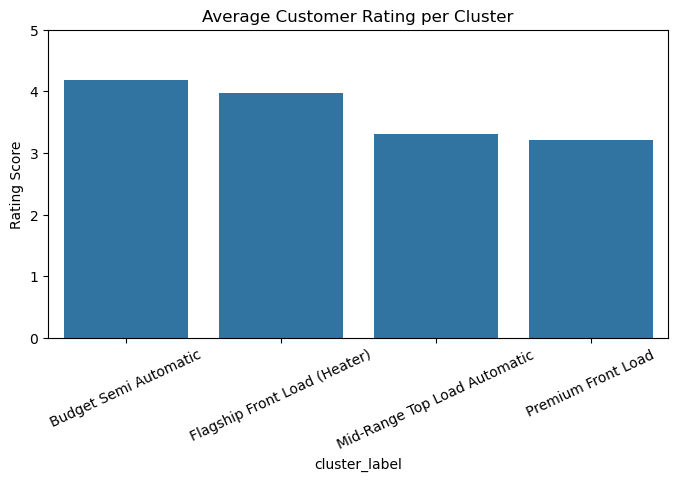

In [55]:
plt.figure(figsize=(8,4))
sns.barplot(data=cluster_summary, x="cluster_label", y="avg_rating")
plt.ylim(0,5)
plt.xticks(rotation=25)
plt.title("Average Customer Rating per Cluster")
plt.ylabel("Rating Score")
plt.show()


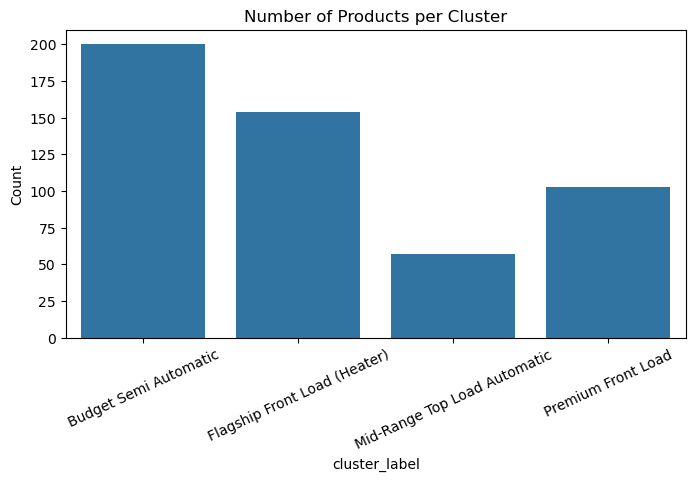

In [56]:
plt.figure(figsize=(8,4))
sns.barplot(data=cluster_summary, x="cluster_label", y="num_products")
plt.xticks(rotation=25)
plt.title("Number of Products per Cluster")
plt.ylabel("Count")
plt.show()
